<font color = green >

# <center>Homework<center>
</font>

__Exploratory Data Analysis (EDA)__ of car insurance dataset.
    
__Dataset description:__ Car insurance claim. As you are working in the insurance company. Company wants to know the reason why claim was not made. Doing so would allow insurance company to improve there policy for giving loan to the customer. In this project you are dealing with various feature such as age, occupation etc. based on that let's get back to the final conculsion.    

__Steps:__
- Data Cleaning
- Descriptive Statistics
- Data Visualization
- Conclusions

In [454]:
# Install libraries from requirements.txt
%pip install -r "C:\Users\DELL\Documents\GitHub\Data_Science\requirements.txt"

Note: you may need to restart the kernel to use updated packages.


In [455]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

COLORS = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [456]:
# File name
CIC_FILE = "Car_Insurance_Claim.csv"

In [457]:
# Load data from CSV file into a DataFrame
data = pd.read_csv(CIC_FILE)

# Display the first 5 rows of the DataFrame to get an overview of the data
data.head()

,Unnamed: 0,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0


In [458]:
# Information about the data columns
data.columns

Index(['Unnamed: 0', 'ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE',
       'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
       'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE',
       'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS',
       'OUTCOME'],
      dtype='object')

In [459]:
# Display information about the DataFrame, including column names, non-null values, and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           10000 non-null  int64 
 1   ID                   10000 non-null  int64 
 2   AGE                  9950 non-null   object
 3   GENDER               9950 non-null   object
 4   RACE                 9951 non-null   object
 5   DRIVING_EXPERIENCE   9950 non-null   object
 6   EDUCATION            9951 non-null   object
 7   INCOME               10000 non-null  object
 8   CREDIT_SCORE         8978 non-null   object
 9   VEHICLE_OWNERSHIP    9950 non-null   object
 10  VEHICLE_YEAR         9950 non-null   object
 11  MARRIED              9952 non-null   object
 12  CHILDREN             9950 non-null   object
 13  POSTAL_CODE          9950 non-null   object
 14  ANNUAL_MILEAGE       9000 non-null   object
 15  VEHICLE_TYPE         9951 non-null   object
 16  SPEED

### Cleaning data

In [460]:
# Delete the "Unnamed: 0" column from the DataFrame
data = data.drop(columns=["Unnamed: 0"])
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0


In [461]:
# Check for duplicate rows in the DataFrame
data.duplicated().sum()

0

In [462]:
# List of values to exclude
exclude_values = ["none years", "nan years", "none"]

# Delete rows where AGE or RACE contain the specified values
data = data[~data["AGE"].isin(exclude_values)]
data = data[~data["RACE"].isin(exclude_values)]

In [463]:
# Delete lines without creating a new variable
data.drop(data[data["AGE"] == "nan years"].index, inplace=True)

In [464]:
# Convert cols to numeric
cols_to_convert = ["VEHICLE_OWNERSHIP", "MARRIED", "CHILDREN", "POSTAL_CODE", "ANNUAL_MILEAGE", "OUTCOME"]
data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors="coerce").fillna(0).astype(int)
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1,after 2015,0,1,10238,12000,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0,before 2015,0,0,10238,16000,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1,before 2015,0,0,10238,11000,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1,before 2015,0,0,32765,11000,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1,before 2015,0,0,32765,12000,sedan,2,0,1,1


In [465]:
# Convert POSTAL_CODE data as string type
data["POSTAL_CODE"] = data["POSTAL_CODE"].astype("object")

# Convert categorical columns to category type
category_cols = ["AGE", "GENDER", "RACE", "DRIVING_EXPERIENCE", "EDUCATION", "INCOME", "VEHICLE_YEAR", "VEHICLE_TYPE"]
for col in category_cols:
    data[col] = data[col].astype("category")

# Convert numeric binary columns to integer before mapping
binary_mappings = {
    "VEHICLE_OWNERSHIP": {1: "owner", 0: "not owner"},
    "MARRIED": {1: "married", 0: "unmarried"},
    "CHILDREN": {1: "has children", 0: "has no children"},
    "OUTCOME": {1: "insurance", 0: "no insurance"}
}

for col, mapping in binary_mappings.items():
    data[col] = data[col].astype("Int64")  # Convert float to int (handling NaN)
    data[col] = data[col].map(mapping).astype("category")  # Map values and convert to category

# Rename category names in AGE and DRIVING_EXPERIENCE columns
data["AGE"] = data["AGE"].astype(str) + " years"
data["DRIVING_EXPERIENCE"] = data["DRIVING_EXPERIENCE"].map({
    "0-9y": "0-9 years", "10-19y": "10-19 years", 
    "20-29y": "20-29 years", "30y+": "30+ years"
})

data.head()  # Preview dataset

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+ years,female,majority,0-9 years,high school,upper class,0.629027313918201,owner,after 2015,unmarried,has children,10238,12000,sedan,0,0,0,no insurance
1,750365,16-25 years,male,majority,0-9 years,none,poverty,0.3577571170184627,not owner,before 2015,unmarried,has no children,10238,16000,sedan,0,0,0,insurance
2,199901,16-25 years,female,majority,0-9 years,high school,working class,0.4931457852181982,owner,before 2015,unmarried,has no children,10238,11000,sedan,0,0,0,no insurance
3,478866,16-25 years,male,majority,0-9 years,university,working class,0.2060128507324556,owner,before 2015,unmarried,has no children,32765,11000,sedan,0,0,0,no insurance
4,731664,26-39 years,male,majority,10-19 years,none,working class,0.3883658881572184,owner,before 2015,unmarried,has no children,32765,12000,sedan,2,0,1,insurance


So, the dataset has 19 columns:
 1. `ID` - entry's ID
 2. `AGE` - age of the customer (splitted into 4 categories: "16-25 years", "26-39 years", "40-64 years" and "65+ years")
 3. `GENDER` - gender of the customer (can be "male" or "female")
 4. `RACE` - race of the customer (can be "majority" or "minority")
 5. `DRIVING_EXPERIENCE` - driving experience of the customer (splitted into 4 categories: "0-9 years", "10-19 years", "20-29 years" and "30+ years")
 6. `EDUCATION` - education of the customer (can be "high school" or "university")
 7. `INCOME` - social status of the customer based on their income (splitted into categories "poverty", "working class", "middle class" and "upper class")
 8. `CREDIT_SCORE` - credit score of the customer (data from the bank)
 9. `VEHICLE_OWNERSHIP` - whether the customer is vehicle's owner (can be "owner" or "not owner")
 10. `VEHICLE_YEAR` - model year of the vehicle (can be "before 2015" or "after 2015")
 11. `MARRIED` - whether the customer is married (can be "married" or "unmarried")
 12. `CHILDREN` - whether the customer has children (can be "has children" or "has no children")
 13. `POSTAL_CODE` - postal code that idetifies the postal address of the customer
 14. `ANNUAL_MILEAGE` - average number of miles that vehicle has travelled in a year
 15. `VEHICLE_TYPE` - type of the vehicle (splitted into 2 categories: "sedan" and "sports car")
 16. `SPEEDING_VIOLATIONS` - number of speed violations commited by the customer
 17. `DUIS` - number of DUI (driving under the influence) incidents commited by the customer
 18. `PAST_ACCIDENTS` - number of past accidents the customer has
 19. `OUTCOME` - target value, whether insurance claim was made (can be "insurance" or "no insurance")

`ID` and `POSTAL_CODE` columns are not important for further data analys, thus 17 columns remain in the dataset.

### Descriptive statistics with data visualization

For sake of simplicity, we can divide the dataset columns into four groups:
 - First group includes columns which contain _general data_ about the customer: `AGE`, `GENDER`, `RACE`, `MARRIED` and `CHILDREN`
 - Second group includes columns which contain _educational and finance data_ about the customer: `EDUCATION`, `INCOME`, `CREDIT_SCORE` and `VEHICLE_OWNERSHIP`
 - Third group includes columns which contain _data about past driving experience_ of the customer: `DRIVING_EXPERIENCE`, `SPEEDING_VIOLATIONS`, `DUIS` and `PAST_ACCIDENTS`
 - Fourth group includes columns which contain _data about the vehicle_ itself: `VEHICLE_YEAR`, `ANNUAL_MILEAGE` and `VEHICLE_TYPE`

First, before analyzing the data in the columns, let's look at the `OUTCOME` data by drawing a pie chart.

In [466]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+ years,female,majority,0-9 years,high school,upper class,0.629027313918201,owner,after 2015,unmarried,has children,10238,12000,sedan,0,0,0,no insurance
1,750365,16-25 years,male,majority,0-9 years,none,poverty,0.3577571170184627,not owner,before 2015,unmarried,has no children,10238,16000,sedan,0,0,0,insurance
2,199901,16-25 years,female,majority,0-9 years,high school,working class,0.4931457852181982,owner,before 2015,unmarried,has no children,10238,11000,sedan,0,0,0,no insurance
3,478866,16-25 years,male,majority,0-9 years,university,working class,0.2060128507324556,owner,before 2015,unmarried,has no children,32765,11000,sedan,0,0,0,no insurance
4,731664,26-39 years,male,majority,10-19 years,none,working class,0.3883658881572184,owner,before 2015,unmarried,has no children,32765,12000,sedan,2,0,1,insurance


In [467]:
data.describe(include="all")

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9900.000000,9900,9851,9851,9801,9853,9900,8896,9900,9851,9900,9900,9900.0,9900.000000,9851,9851,9850,9850,9900
unique,NaN,5,3,2,4,3,4,8848,2,3,2,2,5.0,NaN,3,22,8,16,2
top,NaN,26-39 years,female,majority,0-9 years,high school,upper class,none,owner,before 2015,unmarried,has children,10238.0,NaN,sedan,0,0,0,no insurance
freq,NaN,3021,4917,8878,3464,4079,4292,49,6827,6830,5016,6749,6799.0,NaN,9336,4921,7957,5466,6824
mean,500696.500101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10475.252525,NaN,NaN,NaN,NaN,NaN
std,290039.615898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4463.169784,NaN,NaN,NaN,NaN,NaN
min,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,249789.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000,NaN,NaN,NaN,NaN,NaN
50%,501823.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11000.000000,NaN,NaN,NaN,NaN,NaN
75%,754184.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13000.000000,NaN,NaN,NaN,NaN,NaN


### Data Visualization

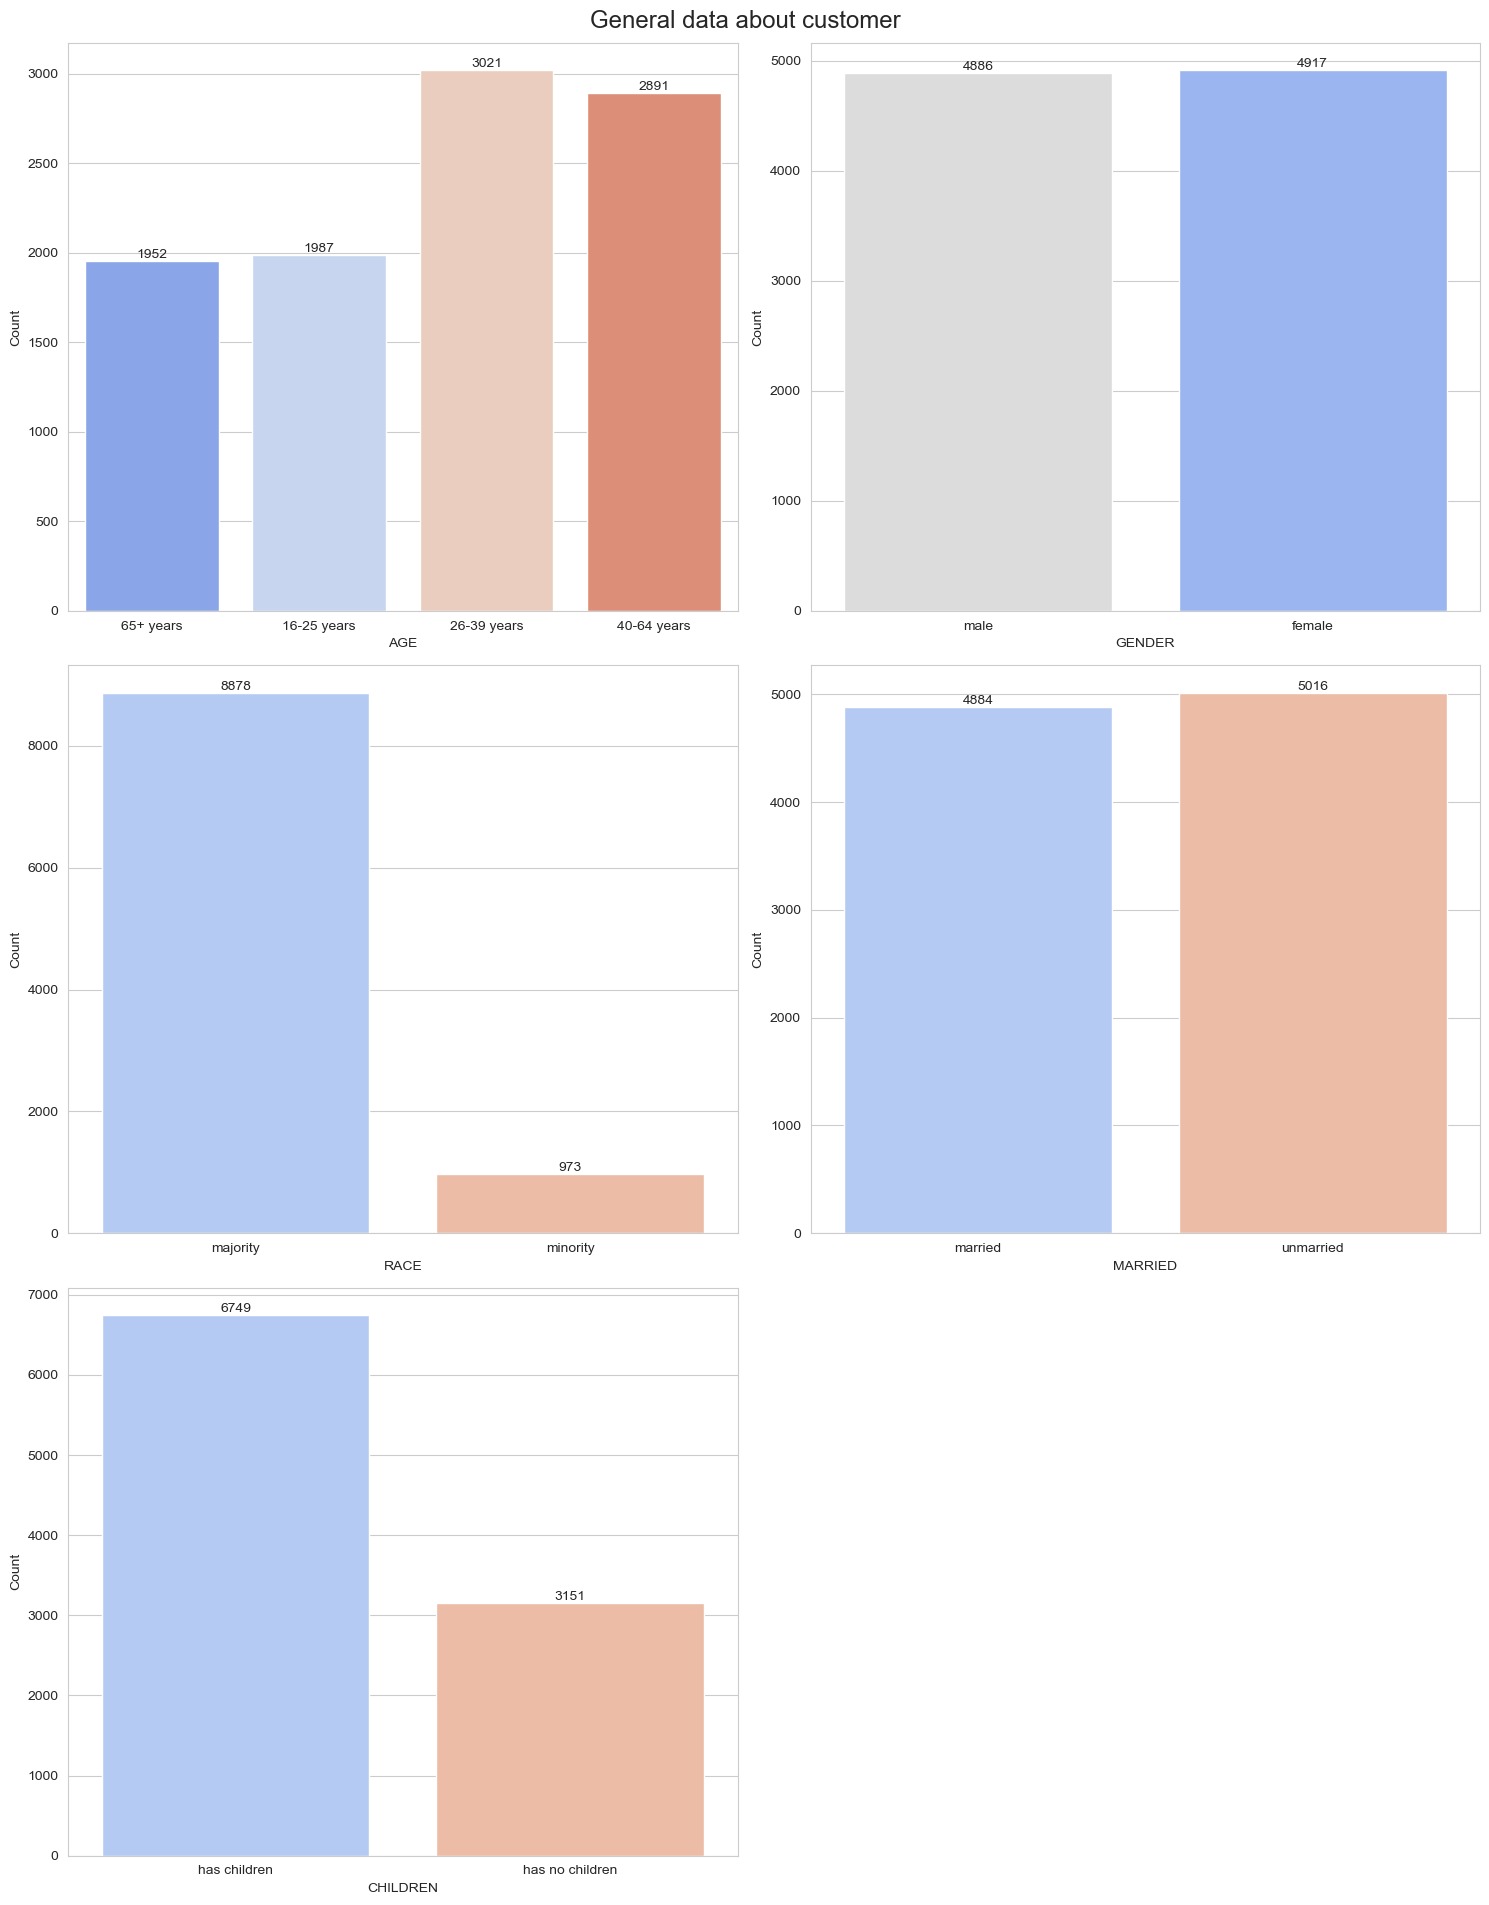

In [468]:
def plot_bar(ax, data, column, order=None, dropna=True, exclude_values=None):
    """
    Shows vertical bar chart for categorical data.
    
    Parameters:
    - ax: Axes object to plot on.
    - data: DataFrame containing the data.
    - column: Column name to plot.
    - order: The order of categories to display (optional).
    - dropna: Whether to drop NaN values or not.
    - exclude_values: A list of values to exclude from the plot (optional).
    """
    if dropna:
        data_clean = data[column].dropna()
    else:
        data_clean = data[column]

    # Exclude specified values from the data
    if exclude_values:
        data_clean = data_clean[~data_clean.isin(exclude_values)]

    sns.countplot(ax=ax, x=data_clean, hue=data_clean, order=order, palette="coolwarm", legend=False)
    ax.set_ylabel("Count")
    
    for container in ax.containers:
        ax.bar_label(container)

def plot_hist(ax, data, column, color=None, bins="auto", discrete=None, dropna=True, exclude_values=None):
    """
    Shows histogram for numerical data.
    
    Parameters:
    - ax: Axes object to plot on.
    - data: DataFrame containing the data.
    - column: Column name to plot.
    - color: Color of the bars.
    - bins: The number of bins in the histogram.
    - discrete: Whether the data is discrete or continuous.
    - dropna: Whether to drop NaN values or not.
    - exclude_values: A list of values to exclude from the plot (optional).
    """
    if dropna:
        data_clean = data[column].dropna()
    else:
        data_clean = data[column]

    # Exclude specified values from the data
    if exclude_values:
        data_clean = data_clean[~data_clean.isin(exclude_values)]

    sns.histplot(ax=ax, data=data_clean, x=column, color=color, bins=bins, discrete=discrete)
    ax.set_ylabel("Count")

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle("General data about customer", y=0.95, fontsize="xx-large")  # Adjust y to move the title up
fig.delaxes(ax[2, 1])  # Remove the empty subplot

# # Define values to exclude (e.g., "None years", "nan years", or other unwanted entries)
exclude_values = ["nan years"]

# Use the new functions to plot
plot_bar(ax=ax[0, 0], data=data, column="AGE", exclude_values = exclude_values)
plot_bar(ax=ax[0, 1], data=data, column="GENDER", order=["male", "female"])
plot_bar(ax=ax[1, 0], data=data, column="RACE",)
plot_bar(ax=ax[1, 1], data=data, column="MARRIED")
plot_bar(ax=ax[2, 0], data=data, column="CHILDREN")

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout and leave space for the title
plt.show()

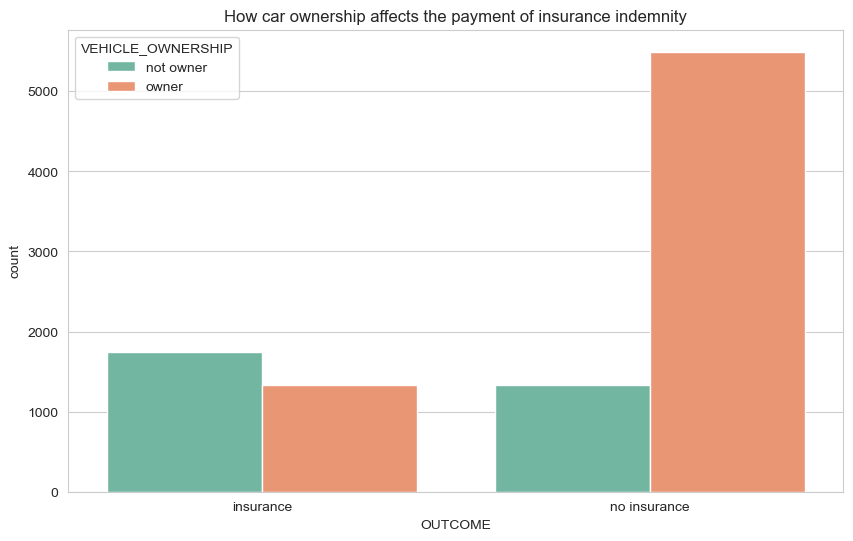

In [469]:
# This plot visualizes how car ownership affects the payment of insurance indemnity.
# It uses a count plot to show the distribution of the 'OUTCOME' variable, 
# separated by car ownership status (hue: 'VEHICLE_OWNERSHIP').

plt.figure(figsize=(10, 6))
sns.countplot(x="OUTCOME", hue="VEHICLE_OWNERSHIP", data=data, palette="Set2")
plt.title("How car ownership affects the payment of insurance indemnity")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_14920\541843275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_data, x="AGE", palette="coolwarm")


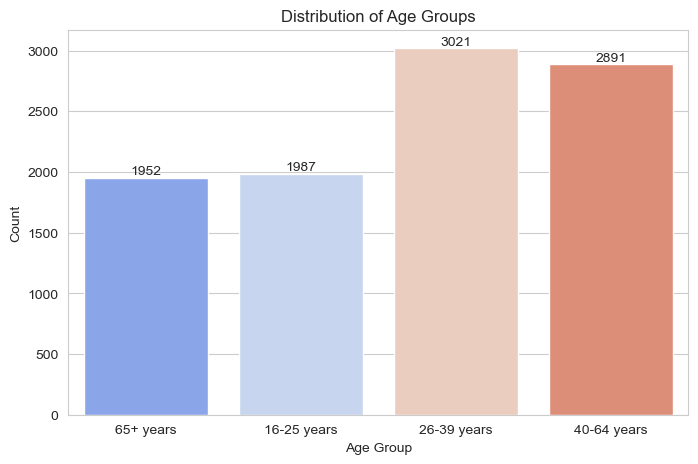

In [470]:
# Filter the data to exclude rows where "AGE" is "nan years"
filtered_data = data[data["AGE"] != "nan years"]

# Plotting the distribution of age groups
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=filtered_data, x="AGE", palette="coolwarm")

# Adding count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

# Adding title and axis labels
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

📌 Insight: This will show how many customers fall into each age group.

C:\Users\DELL\AppData\Local\Temp\ipykernel_14920\2642482317.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="INCOME", palette="viridis", order=['poverty', 'working class', 'middle class', 'upper class'])


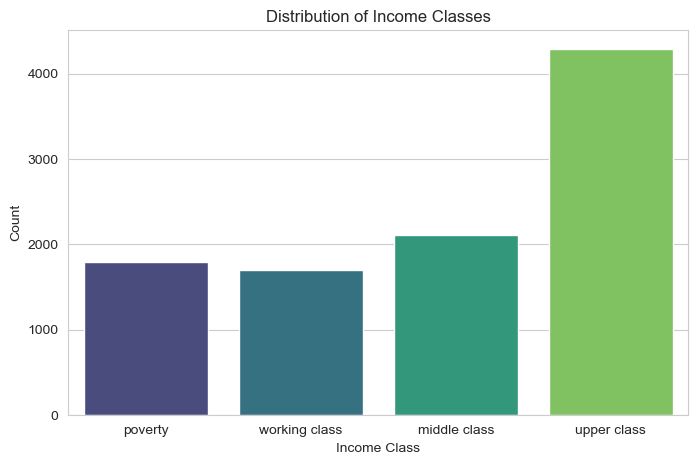

In [471]:
# Income Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="INCOME", palette="viridis", order=['poverty', 'working class', 'middle class', 'upper class'])
plt.title("Distribution of Income Classes")
plt.xlabel("Income Class")
plt.ylabel("Count")
plt.show()

📌 Insight: We can see if the dataset is balanced or dominated by a particular class.

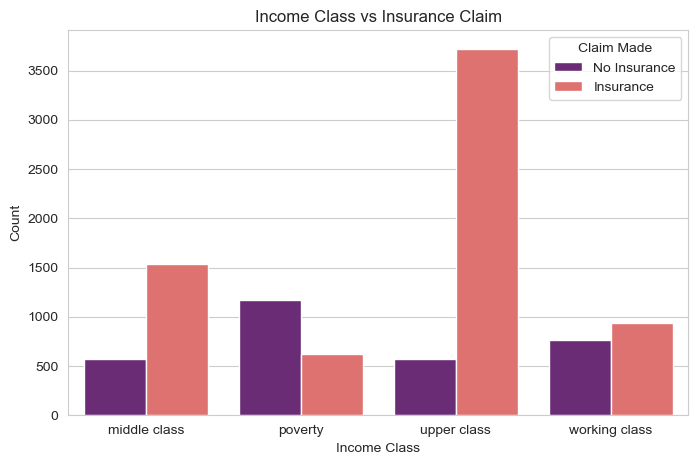

In [472]:
# Relation Between Income and Insurance Claims
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="INCOME", hue="OUTCOME", palette="magma")
plt.title("Income Class vs Insurance Claim")
plt.xlabel("Income Class")
plt.ylabel("Count")
plt.legend(title="Claim Made", labels=["No Insurance", "Insurance"])
plt.show()

📌 Insight: This will reveal whether people from lower or higher income groups tend to make more insurance claims.

C:\Users\DELL\AppData\Local\Temp\ipykernel_14920\4242037773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="VEHICLE_OWNERSHIP", y="PAST_ACCIDENTS", palette="Set2")


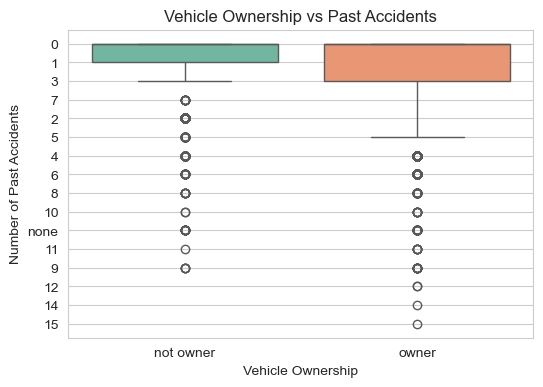

In [473]:
# Vehicle Ownership and Accidents
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x="VEHICLE_OWNERSHIP", y="PAST_ACCIDENTS", palette="Set2")
plt.title("Vehicle Ownership vs Past Accidents")
plt.xlabel("Vehicle Ownership")
plt.ylabel("Number of Past Accidents")
plt.show()

📌 Insight: If vehicle owners have more past accidents, it may suggest a riskier driving behavior.

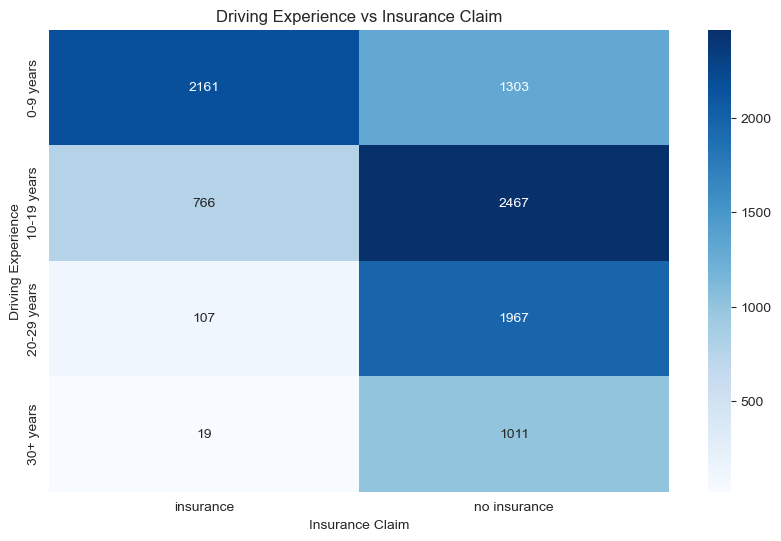

In [474]:
# How Driving Experience Affects Insurance Claims
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(data['DRIVING_EXPERIENCE'], data['OUTCOME']), annot=True, cmap="Blues", fmt="d")
plt.title("Driving Experience vs Insurance Claim")
plt.xlabel("Insurance Claim")
plt.ylabel("Driving Experience")
plt.show()

📌 Insight: This will tell us whether more experienced drivers tend to claim insurance more or less frequently.

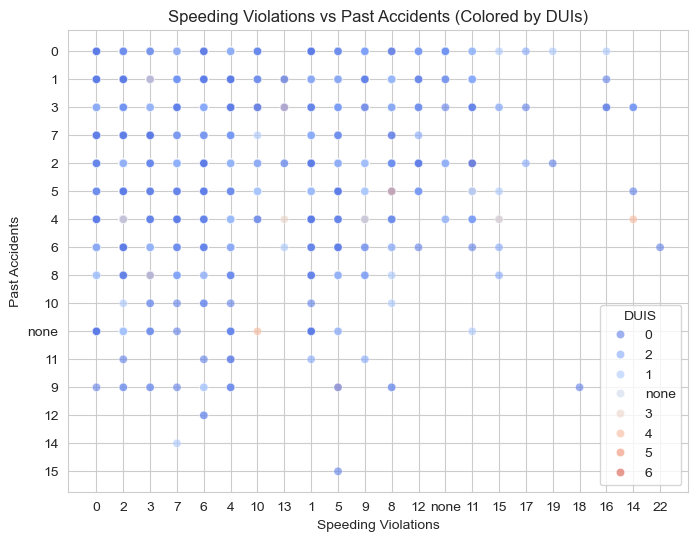

In [475]:
# Relationship Between Speeding Violations, DUIs, and Past Accidents
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="SPEEDING_VIOLATIONS", y="PAST_ACCIDENTS", hue="DUIS", palette="coolwarm", alpha=0.6)
plt.title("Speeding Violations vs Past Accidents (Colored by DUIs)")
plt.xlabel("Speeding Violations")
plt.ylabel("Past Accidents")
plt.show()

📌 Insight: If there's a positive trend, we can conclude that more speeding violations lead to more accidents.

In [476]:
# Delete columns ID and POSTAL_CODE from dataset
converted = data.drop(["ID", "POSTAL_CODE"], axis="columns")

# Замінюємо всі значення "none" на NaN
converted.replace("none", np.nan, inplace=True)

# Convert categorical data to numeric type
to_numeric = {
    "AGE": {"16-25 years": 0, "26-39 years": 1, "40-64 years": 2, "65+ years": 3},
    "GENDER": {"male": 0, "female": 1},
    "RACE": {"majority": 0, "minority": 1},
    "DRIVING_EXPERIENCE": {"0-9 years": 0, "10-19 years": 1, "20-29 years": 2, "30+ years": 3},
    "EDUCATION": {"high school": 0, "university": 1},
    "INCOME": {"poverty": 0, "working class": 1, "middle class": 2, "upper class": 3},
    "VEHICLE_OWNERSHIP": {"not owner": 0, "owner": 1},
    "VEHICLE_YEAR": {"before 2015": 0, "after 2015": 1},
    "MARRIED": {"unmarried": 0, "married": 1},
    "CHILDREN": {"has no children": 0, "has children": 1},
    "VEHICLE_TYPE": {"sedan": 0, "sports car": 1},
    "OUTCOME": {"no insurance": 0, "insurance": 1}
}
for column, mapping in to_numeric.items():
    converted[column] = converted[column].map(mapping).astype(float)

# Check dataset values
converted.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14920\3905441542.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  converted.replace("none", np.nan, inplace=True)


,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3.0,1.0,0.0,0.0,0.0,3.0,0.629027313918201,1.0,1.0,0.0,1.0,12000,0.0,0,0,0,0.0
1,0.0,0.0,0.0,0.0,NaN,0.0,0.3577571170184627,0.0,0.0,0.0,0.0,16000,0.0,0,0,0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.4931457852181982,1.0,0.0,0.0,0.0,11000,0.0,0,0,0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.2060128507324556,1.0,0.0,0.0,0.0,11000,0.0,0,0,0,0.0
4,1.0,0.0,0.0,1.0,NaN,1.0,0.3883658881572184,1.0,0.0,0.0,0.0,12000,0.0,2,0,1,1.0


<Axes: >

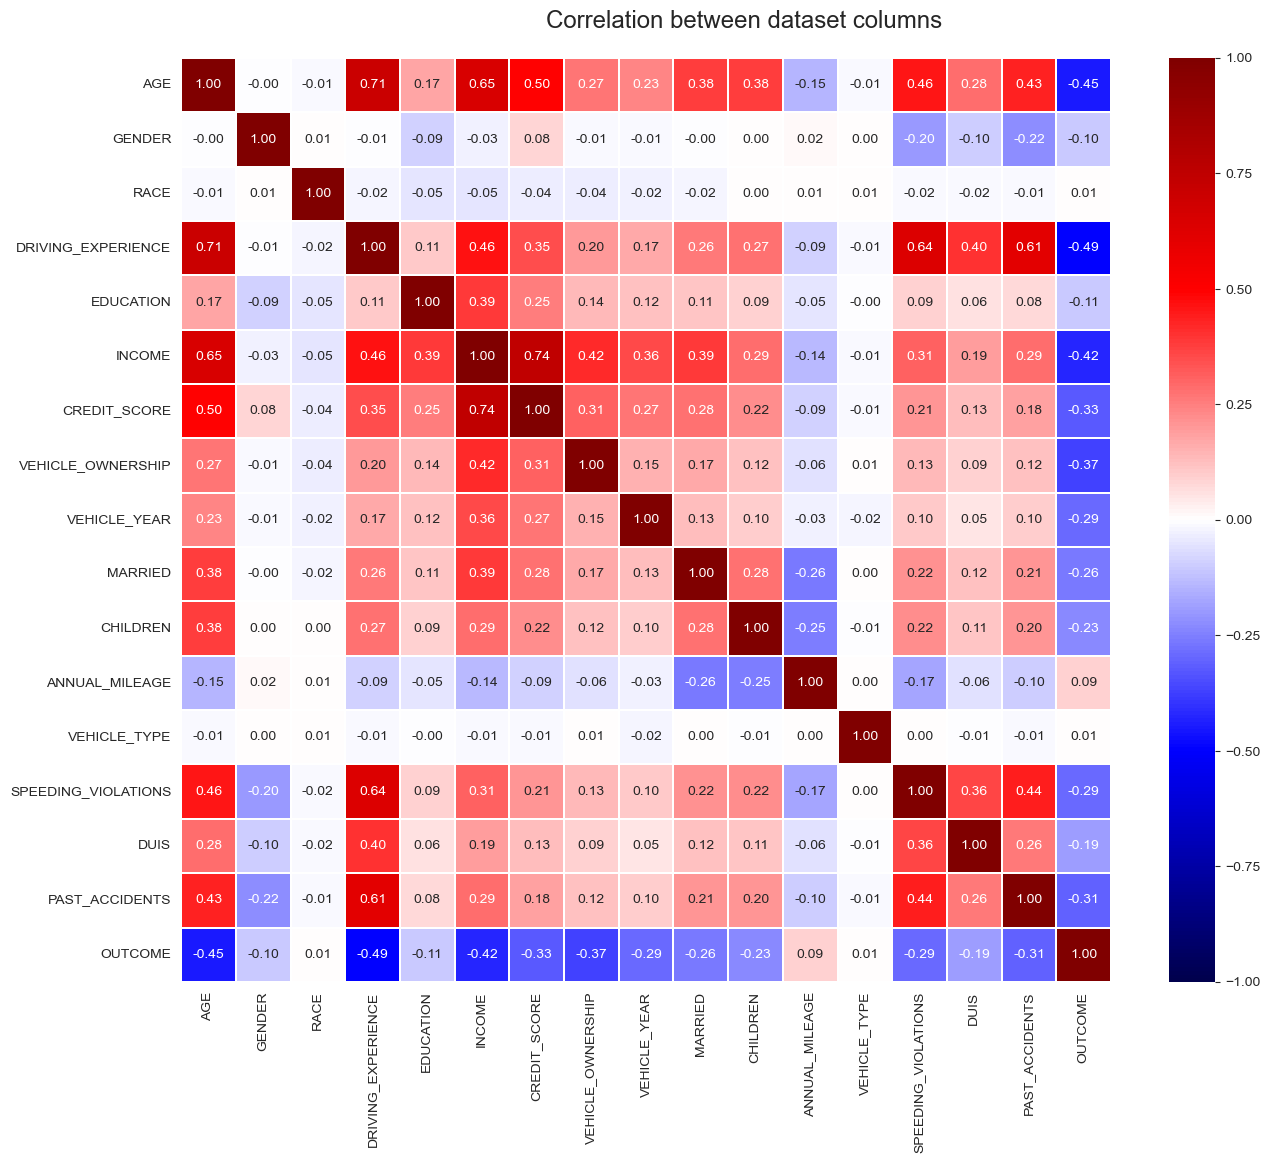

In [477]:
fig = plt.figure(figsize=(15, 12))
fig.suptitle("Correlation between dataset columns", y=0.92, fontsize="xx-large")
sns.heatmap(data=converted.corr(), annot=True, fmt=".2f", linewidths=0.1, cmap="seismic", vmin=-1, vmax=1)

Now we can determine the effect of the columns on the `OUTCOME` value based on the information in the grouped diagrams and in the heat map.

 - For `AGE` there is negative correlation (-0.45): insurance claim can be made more likely to younger customers
 - For `GENDER` there is low negative correlation (-0.11) [note: male - 0, female - 1]: insurance claim can be made slightly more likely to male customers
 - For `RACE` correlation is close to zero (0.01) [note: majority race - 0, minority race - 1]: race of customer does not have significant effect on the `OUTCOME` value
 - For `DRIVING_EXPERIENCE` there is negative correlation (-0.50): insurance claim can be made more likely to customers less driving expirience
 - For `EDUCATION` there is low negative correlation (-0.11) [note: high school - 0, university - 1]: insurance claim can be made slightly more likely to customers who have only completed high school
 - For `INCOME` there is negative correlation (-0.42): insurance claim can be made more likely to customers from poorer social classes
 - For `CREDIT_SCORE` there is negative correlation (-0.33): insurance claim can be made more likely to customers with lower credit score
 - For `VEHICLE_OWNERSHIP` there is negative correlation (-0.38): insurance claim can be made more likely to customers who do not own the vehicle
 - For `VEHICLE_YEAR` there is negative correlation (-0.29): insurance claim can be made more likely to customers with vehicles produced before 2015
 - For `MARRIED` there is negative correlation (-0.26): insurance claim can be made less likely to married customers
 - For `CHILDREN` there is negative correlation (-0.23): insurance claim can be made less likely to customers with children
 - For `ANNUAL_MILEAGE` there is low positive correlation (0.19): insurance claim can be made more likely to customers with vehicles which have slightly higher annual mileage
 - For `VEHICLE_TYPE` correlation is close to zero (0.01) [note: sedan - 0, sports car - 1]: vehicle type does not have significant effect on the `OUTCOME` value
 - For `SPEEDING_VIOLATIONS` there is negative correlation (-0.29): insurance claim can be made more likely to customers who have commited less speeding violations or have not commited any speeding violations
 - For `DUIS` there is low negative correlation (-0.19): insurance claim can be made more likely to customers who have commited slightly less DUI incidents
 - For `PAST_ACCIDENTS` the is negative correlation (-0.33): insurance claim can be made more likely to customers have commited less past accidents or have not commited any past accidents

Therefore, the columns which have the highest effect on the `OUTCOME` value are `AGE`, `DRIVING_EXPERIENCE`, `INCOME` and `VEHICLE_OWNERSHIP`.